# Learning Pandas through online resources. Lesson 1

Click here for [source](https://nbviewer.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb).

In [55]:
# Syntax to import specific functions
from pandas import DataFrame, read_csv

#Syntax to import a library
import matplotlib.pyplot as plt 
import pandas as pd #usual import for pandas
import sys #determines the Python version
import matplotlib #determines the Matplotlib version

%matplotlib inline 

In [56]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:47:18) [MSC v.1916 64 bit (AMD64)]
Pandas version 1.5.3
Matplotlib version 3.7.1


## Create Data 

The data set will consist of 5 baby names and the number of births recorded for that year (1880).

In [57]:
# The set of baby names and birth rates
names = ['Bob', 'Jessica', 'Mary', 'John', 'Mel']
births = [968, 155, 77, 578, 973]

Merge the two lists together using the ***zip*** function

In [58]:
#explains the functions by using the (?) character
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.

If strict is true and one of the arguments is exhausted before the others,
raise a ValueError.
Type:           type
Subclasses:     

In [59]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

We are basically done creating the data set. We now will use the ***pandas*** library to export this data set into a csv file.

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [60]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973

Export the dataframe to a ***csv*** file. We can name the file ***births1880.csv***. The function ***to_csv*** will be used to export the file. The file will be saved in the same location of the notebook unless specified otherwise.

In [61]:
df.to_csv?

Signature:
df.to_csv(
    path_or_buf: 'FilePath | WriteBuffer[bytes] | WriteBuffer[str] | None' = None,
    sep: 'str' = ',',
    na_rep: 'str' = '',
    float_format: 'str | Callable | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'bool_t | list[str]' = True,
    index: 'bool_t' = True,
    index_label: 'IndexLabel | None' = None,
    mode: 'str' = 'w',
    encoding: 'str | None' = None,
    compression: 'CompressionOptions' = 'infer',
    quoting: 'int | None' = None,
    quotechar: 'str' = '"',
    lineterminator: 'str | None' = None,
    chunksize: 'int | None' = None,
    date_format: 'str | None' = None,
    doublequote: 'bool_t' = True,
    escapechar: 'str | None' = None,
    decimal: 'str' = '.',
    errors: 'str' = 'strict',
    storage_options: 'StorageOptions' = None,
) -> 'str | None'
Docstring:
Write object to a comma-separated values (csv) file.

Parameters
----------
path_or_buf : str, path object, file-like object, or None, default None
  

The only parameters we will use is ***index*** and ***header***. Setting these parameters to False will prevent the index and header names from being exported. Change the values of these parameters to get a better understanding of their use.

In [62]:
df.to_csv('births1880.csv',index=False,header=False)

## Get Data

To pull in the csv file, we will use the pandas function read_csv. Let us take a look at this function and what inputs it takes.

In [63]:
read_csv?

Signature:
read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=None,
    infer_da



Even though this functions has many parameters, we will simply pass it the location of the text file.

Location = C:\Users\levil\Independent\births1880.csv

**Note:** Depending on where you save your notebooks, you may need to modify the location above.


In [64]:
Location = r'C:\Users\levil\Independent\births1880.csv'

In [65]:
df = pd.read_csv(Location)

Notice the **r** before the string. Since the slashes are special characters, prefixing the string with a *r* will escape the whole string.

In [66]:
df

Bob  968
0  Jessica  155
1     Mary   77
2     John  578
3      Mel  973



This brings us to the first problem of the exercise. The **read_csv** function treated the first record in the csv file as the header names. This is obviously not correct since the text file did not provide us with header names.

To correct this we will pass the **header** parameter to the read_csv function and set it to **None** (means null in python).


In [67]:
df = pd.read_csv(Location, header=None)
df

0    1
0      Bob  968
1  Jessica  155
2     Mary   77
3     John  578
4      Mel  973

If we wanted to give the columns specific names, we would have to pass another parameter called **names**. We can also omit the **header** parameter.

In [68]:
df = pd.read_csv(Location, names=['Names','Births'])
df

Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973



You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the **index** of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.

**[Names, Births]** can be thought of as column headers similar to the ones found in an Excel spreadsheet or sql database.


> Delete the csv file now that we are done using it

In [69]:
import os
# removes a file
os.remove(Location)

## Prepare Data


The data we have consists of baby names and the number of births in the year 1880. We already know that we have 5 records and none of the records are missing (non-null values).

The **Names** column at this point is of no concern since it most likely is just composed of alpha numeric strings (baby names). There is a chance of bad data in this column but we will not worry about that at this point of the analysis. The **Births** column should just contain integers representing the number of babies born in a specific year with a specific name. We can check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. I would not worry about any possible outliers at this point of the analysis.

Realize that aside from the check we did on the "Names" column, briefly looking at the data inside the dataframe should be as far as we need to go at this stage of the game. As we continue in the data analysis life cycle we will have plenty of opportunities to find any issues with the data set.


In [70]:
# Check data type of the columns
df.dtypes

Names     object
Births     int64
dtype: object

In [71]:
# Check data type of Births column
df.Births.dtype

dtype('int64')

As you can see the Births column is of type **int64**, thus no floats (decimal numbers) or alpha numeric characters will be present in this column.

## Analyze Data

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

* Sort the dataframe and select the top row
* Use the **max()** attribute to find the maximum value

In [72]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

Names  Births
4   Mel     973

In [73]:
# Method 2:
df['Births'].max()

973

## Present Data

Here we can plot the **Births** column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that **Mel** is the most popular baby name in the data set.

**plot()** is a convinient attribute where pandas lets you painlessly plot the data in your dataframe. We learned how to find the maximum value of the Births column in the previous section. Now to find the actual baby name of the 973 value looks a bit tricky, so lets go over it.

**Explain the pieces:**
df['Names'] - This is the entire list of baby names, the entire Names column
df['Births'] - This is the entire list of Births in the year 1880, the entire Births column
df['Births'].max() - This is the maximum value found in the Births column

[df['Births'] == df['Births'].max()] **IS EQUAL TO** [Find all of the records in the Births column where it is equal to 973]
df['Names'][df['Births'] == df['Births'].max()] **IS EQUAL TO** Select all of the records in the Names column **WHERE** [The Births column is equal to 973]

An alternative way could have been to use the **Sorted** dataframe:
Sorted['Names'].head(1).value

The **str()** function simply converts an object into a string.


The most popular name


Names  Births
4   Mel     973

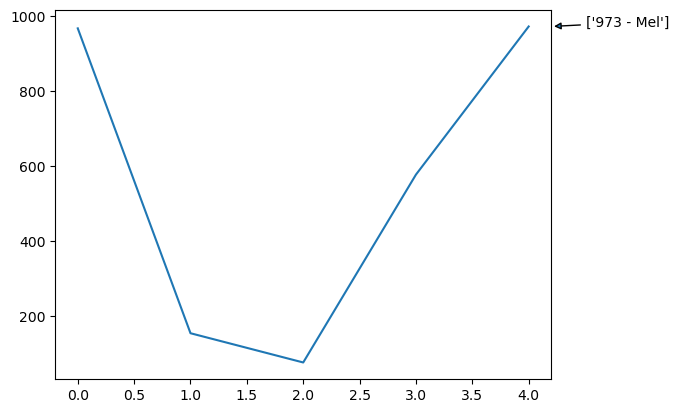

In [74]:
# Create graph
df['Births'].plot()

# Maximum Value in the data set
MaxValue = df['Births'].max()

# Name assocaited with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue),
                   xytext=(25, 0),
                   xycoords=('axes fraction', 'data'),
                   textcoords='offset points',
                   arrowprops=dict(arrowstyle='-|>'))

print("The most popular name")
df[df['Births']==df['Births'].max()]
# Sorted.head(1) can also be used